In [18]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
from enum import Enum
from dotenv import load_dotenv

load_dotenv()

ODS_API_KEY = os.getenv("ODS_API_KEY")
ODS_PAYSAGE_KEY = os.getenv("ODS_PAYSAGE_KEY")

AFFILIATION_MATCHER_API = f"{os.getenv('AFFILIATION_MATCHER_URL')}/match"
AFFILIATION_MATCHER_API_LOCAL = "http://localhost:5004/match"
AFFILIATION_MATCHER_LIST_API = "http://localhost:5004/match_list"
AFFILIATION_MATCHER_LIST_TASK_API = "http://localhost:5004/tasks"

COL_AFFILIATION_IS_MATCH = "affiliation_is_match"
COL_AFFILIATION_STR = "affiliation_string"

MATCH_TYPE = "paysage"

FILE_PATH = "../paysage_match_list_paysage_acronym.json"

In [19]:
# api/match
def affiliation_get_matches(affiliation: str, year=None, local=False):
  if not isinstance(affiliation, str):
    return None
  
  body = {"type": MATCH_TYPE, "query": affiliation}
  if year:
    body["year"] = year
  
  url = AFFILIATION_MATCHER_API_LOCAL if local else AFFILIATION_MATCHER_API
  

  res=requests.post(url=url, json=body)

  if res.status_code == 202:
    return res.json()
  
  raise Exception("ERROR_{res.status_code}")

# indice find
def elastic_percolate(indice, query):
  url = "http://localhost:9200"
  body = { "query": {"percolate": {"field": "query", "document": { "content": query}}}}
  res = requests.post(f"{url}/{indice}/_search", json=body)
  return res.json()

In [20]:
df = pd.read_json(FILE_PATH)
df.head(2)

,identifiant_rnsr,identifiant_interne,etat,date_fermeture,sigle,uo_lib,uo_lib_officiel,adresse_uai,lieu_dit_uai,boite_postale_uai,code_postal_uai,localite_acheminement_uai,pays_etranger_acheminement,affiliation_string,affiliation_string_off,affiliation_match,affiliation_match_off,affiliation_is_match,affiliation_is_match_off
0,None,7CYWd,False,2019.0,UNS,Université Nice - Sophia-Antipolis,Université de Nice,28 avenue de Valrose,GRAND CHATEAU,None,06108,Nice CEDEX 2,France,"UNS - Université Nice - Sophia-Antipolis, 28 a...","UNS - Université de Nice, 28 avenue de Valrose...",[7CYWd],[7CYWd],MATCH.ID_MATCH,MATCH.ID_MATCH
1,None,542Id,True,NaN,UT1,Université Toulouse Capitole,Université Toulouse-I,2 rue du Doyen-Gabriel-Marty,None,None,31042,Toulouse CEDEX,France,"UT1 - Université Toulouse Capitole, 2 rue du D...","UT1 - Université Toulouse-I, 2 rue du Doyen-Ga...",[542Id],[542Id],MATCH.ID_MATCH,MATCH.ID_MATCH


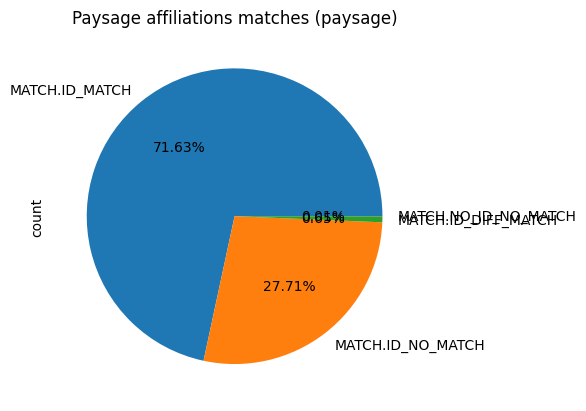

In [21]:
df[COL_AFFILIATION_IS_MATCH].value_counts().plot.pie(title=f"Paysage affiliations matches ({MATCH_TYPE})", autopct="%.02f%%")
plt.show()

DIFF_MATCH

In [22]:
df_diff_match = df[df[COL_AFFILIATION_IS_MATCH] == "MATCH.ID_DIFF_MATCH"]

In [23]:
test = df_diff_match.iloc[1]
display(test)
print(test[COL_AFFILIATION_STR])
affiliation_get_matches(test[COL_AFFILIATION_STR])

identifiant_rnsr                                                           None
identifiant_interne                                                       JH1iJ
etat                                                                       True
date_fermeture                                                              NaN
sigle                                                                      None
uo_lib                        IMT Atlantique Bretagne Pays de la Loire - Cam...
uo_lib_officiel               IMT Atlantique Bretagne Pays de la Loire - Cam...
adresse_uai                                             Technopôle Brest-Iroise
lieu_dit_uai                                                               None
boite_postale_uai                                                      CS 83818
code_postal_uai                                                           29238
localite_acheminement_uai                                        Brest CEDEX 03
pays_etranger_acheminement              

IMT Atlantique Bretagne Pays de la Loire - Campus de Brest, Technopôle Brest-Iroise, CS 83818, 29238, Brest CEDEX 03, France


{'Error': 'Matcher type paysage unknown'}

In [24]:
indice = "matcher-20240409131913_paysage_name"
query = "California State University"
elastic_percolate(indice, query)

{'error': {'root_cause': [{'type': 'index_not_found_exception',
    'reason': 'no such index [matcher-20240409131913_paysage_name]',
    'resource.type': 'index_or_alias',
    'resource.id': 'matcher-20240409131913_paysage_name',
    'index_uuid': '_na_',
    'index': 'matcher-20240409131913_paysage_name'}],
  'type': 'index_not_found_exception',
  'reason': 'no such index [matcher-20240409131913_paysage_name]',
  'resource.type': 'index_or_alias',
  'resource.id': 'matcher-20240409131913_paysage_name',
  'index_uuid': '_na_',
  'index': 'matcher-20240409131913_paysage_name'},
 'status': 404}